In [1]:
import numpy as np

In [2]:

#! /usr/bin/env python3
#
def forward_euler ( f_ode, xRange, yInitial, numSteps ):
    """
  x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 

  uses Euler's explicit method on a system of ODEs dy/dx=f_ode(x,y).

  Input:
    f_ode evaluates the right hand side.
    xRange = [x1,x2], the solution interval.
    yInitial = k initial values for y at x1
    numSteps = number of equally-sized steps to take from x1 to x2
  Output:
    x = numSteps+1 x values.
    y = numSteps+1 rows and k columns, with k-th row containing solution at x[k]
  """
    import numpy as np

    x = np.zeros ( numSteps + 1 )
    y = np.zeros ( ( numSteps + 1, np.size ( yInitial ) ) )

    dx = ( xRange[1] - xRange[0] ) / numSteps

    for k in range ( 0, numSteps + 1 ):

        if ( k == 0 ):
            x[0] = xRange[0]
            y[0,:] = yInitial
        else:
            x[k] = x[k-1] + dx
            y[k,:] = y[k-1,:] + dx * f_ode( x[k-1], y[k-1,:] )

    return x, y




def humps_deriv ( x, y ):

    yp = - 2.0 * ( x - 0.3 ) / ( ( x - 0.3 )**2 + 0.01 )**2 \
        - 2.0 * ( x - 0.9 ) / ( ( x - 0.9 )**2 + 0.04 )**2

    return yp

def forward_euler_test ( ):


    import matplotlib.pyplot as plt
    import numpy as np

    print ( '' )
    print ( 'forward_euler_test():' )
    print ( '  Solve the humps ODE system using forward_euler().' )

    f = humps_deriv
    tspan = np.array ( [ 0.0, 2.0 ] )
    y0 = 5.1765
    n = 100
    t, y = forward_euler ( f, tspan, y0, n )

    plt.plot ( t, y, 'r-', linewidth = 2 )

    a = tspan[0]
    b = tspan[1]
    if ( a <= 0.0 and 0.0 <= b ):
        plt.plot ( [a,b], [0,0], 'k-', linewidth = 2 )

    ymin = min ( y )
    ymax = max ( y )
    if ( ymin <= 0.0 and 0.0 <= ymax ):
        plt.plot ( [0, 0], [ymin,ymax], 'k-', linewidth = 2 )

    plt.grid ( True )
    plt.xlabel ( '<--- T --->' )
    plt.ylabel ( '<--- Y(T) --->' )
    plt.title ( 'forward_euler_test(): time plot' )

    filename = 'forward_euler.jpg'
    plt.savefig ( filename )
    print ( '  Graphics saved as "%s"' % ( filename ) )
    plt.show ( )
    plt.close ( )

    return
    
    if ( __name__ == '__main__' ):
        forward_euler_test ( )



In [3]:
x = np.zeros ( 10 + 1 )
x = np.array([1,2,3,4,5])
x[0]

1

In [4]:
#%%writefile expm_ode.py
def expm_ode ( x, y ): 
    """
    expm ode ( x, y ) evaluates the ODE right 
    hand side dy/dx= -y + 3 * x
    Input :
    x is the independent variable
    y is the dependent variable Output :
    fValue is the value of dy/dx """
    fValue =  -y - 3.0 * x
    return fValue

In [5]:


# x, y = forward_euler ( f_ode, xRange, yInitial, numSteps )
from expm_ode import expm_ode
import numpy as np
f_ode = expm_ode
xRange = np.array ( [ 0.0, 2.0 ] ) 
yInit = 1.0
numSteps = [10,20,40,80,160,320]

#x = 2 and y2 = −2exp(−x) − 3x + 3
xt = 2
y2 = -2 * np.exp(- xt) - 3 * xt + 3

# error = approx soln - exact soln
e = np.zeros(len(numSteps))

# error ratio r[k]= e[k] / e[k+1]
r = np.zeros(len(numSteps) - 1)

for i in range(0, len(numSteps)):
    x, y = forward_euler ( f_ode , xRange, yInit , numSteps[i] )
    e[i] = y[-1,0]- y2 
    print("i = ", i, " y[-1,0]=", y[-1,0])
for i in range(0,5):
    r[i]= e[i] / e[i+1]



ModuleNotFoundError: No module named 'expm_ode'

In [6]:


def rk2 ( f_ode, xRange, yInitial, numSteps ):
    """
  x, y = rk2( f_ode, xRange, yInitial, numSteps ) 

  uses Runge-Kutta/Euler's halfstep method on a system of ODEs dy/dx=f_ode(x,y).

  Input:
    f_ode evaluates the right hand side.
    xRange = [x1,x2], the solution interval.
    yInitial = k initial values for y at x1
    numSteps = number of equally-sized steps to take from x1 to x2
  Output:
    x = numSteps+1 x values.
    y = numSteps+1 rows and k columns, with k-th row containing solution at x[k]
  """
    import numpy as np

    x = np.zeros ( numSteps + 1 )
    y = np.zeros ( ( numSteps + 1, np.size ( yInitial ) ) )

    dx = ( xRange[1] - xRange[0] ) / numSteps

    for k in range ( 0, numSteps + 1 ):

        if ( k == 0 ):
            x[0] = xRange[0]
            y[0,:] = yInitial
        else:
            xa = x[k-1] + 0.5 * dx
            ya = y[k-1,:] + 0.5 * dx * f_ode( x[k-1], y[k-1,:] )
            
            x[k] = x[k-1] + dx
            y[k,:] = y[k-1,:] + dx * f_ode( xa, ya )

    return x, y




In [7]:

# x, y = rk2 ( f_ode, xRange, yInitial, numSteps )

from expm_ode import expm_ode
import numpy as np
f_ode = expm_ode
xRange = np.array ( [ 0.0, 2.0 ] ) 
yInit = 1.0
numSteps = [10,20,40,80,160,320]

#x = 2 and y2 = −2exp(−x) − 3x + 3
xt = 2
y2 = -2 * np.exp(- xt) - 3 * xt + 3

# error = approx soln - exact soln
e = np.zeros(len(numSteps))

# error ratio r[k]= e[k] / e[k+1]
r = np.zeros(len(numSteps) - 1)

for i in range(0, len(numSteps)):
    x, y = rk2 ( f_ode , xRange, yInit , numSteps[i] )
    e[i] = y[-1,0]- y2 
    print("i = ", i, " y[-1,0]=", y[-1,0])
for i in range(0,5):
    r[i]= e[i] / e[i+1]

    
# Claim: It takes forward_euler approx. 163840 steps to reach
# the error of rk2 with 320 steps.

# rk2 with 320 steps
x, y_rk2 = rk2 ( f_ode , xRange, yInit , 320 )
e_rk2 = y_rk2[-1,0]- y2 

# forward_euler with 163840 steps
x, y_fe = forward_euler ( f_ode , xRange, yInit , 163840 )
e_fe = y_fe[-1,0]- y2 

# check
print(abs(e_rk2/ e_fe))

ModuleNotFoundError: No module named 'expm_ode'

In [8]:


def rk3 ( f_ode, xRange, yInitial, numSteps ):
    """
  x, y = rk3( f_ode, xRange, yInitial, numSteps ) 

  uses Runge-Kutta/Euler's  method on a system of ODEs dy/dx=f_ode(x,y).
  
    xa = x[k-1] + 0.5 * dx
    ya = y[k-1,:] + 0.5 * dx * f_ode( x[k-1], y[k-1,:] )
    
    xb = x[k-1] +  dx
    yb = y[k-1,:] + dx * (2f_ode( xa, ya ) - f_ode(xk,yk))
  
    x[k] = x[k-1] + dx
    y[k,:] = y[k-1,:] + dx * (f_ode(xk-1, yk-1) + 4f_ode(xa,ya) + f_ode(xb,yb))/6.0

  Input:
    f_ode evaluates the right hand side.
    xRange = [x1,x2], the solution interval.
    yInitial = k initial values for y at x1
    numSteps = number of equally-sized steps to take from x1 to x2
  Output:
    x = numSteps+1 x values.
    y = numSteps+1 rows and k columns, with k-th row containing solution at x[k]
  """
    import numpy as np

    x = np.zeros ( numSteps + 1 )
    y = np.zeros ( ( numSteps + 1, np.size ( yInitial ) ) )

    dx = ( xRange[1] - xRange[0] ) / numSteps

    for k in range ( 0, numSteps + 1 ):

        if ( k == 0 ):
            x[0] = xRange[0]
            y[0,:] = yInitial
        else:
            xa = x[k-1] + 0.5 * dx
            ya = y[k-1,:] + 0.5 * dx * f_ode( x[k-1], y[k-1,:] )
    
            xb = x[k-1] +  dx
            yb = y[k-1,:] + dx * (2 * f_ode( xa, ya ) - f_ode(x[k-1],y[k-1,:]))
  
            x[k] = x[k-1] + dx
            y[k,:] = y[k-1,:] + dx * (f_ode(x[k-1], y[k-1,:]) + 4 * f_ode(xa,ya) + f_ode(xb,yb))/6.0

    return x, y




In [10]:


# Exercise3
# x, y = rk3 ( f_ode, xRange, yInitial, numSteps )
from expm_ode import expm_ode
import numpy as np
f_ode = expm_ode
xRange = np.array ( [ 0.0, 2.0 ] ) 
yInit = 1.0
numSteps = [10,20,40,80,160,320]

#x = 2 and y2 = −2exp(−x) − 3x + 3
xt = 2
y2 = -2 * np.exp(- xt) - 3 * xt + 3

# error = approx soln - exact soln
e = np.zeros(len(numSteps))

# error ratio r[k]= e[k] / e[k+1]
r = np.zeros(len(numSteps) - 1)

for i in range(0, len(numSteps)):
    x, y = rk3 ( f_ode , xRange, yInit , numSteps[i] )
    e[i] = y[-1,0]- y2 
    print("i = ", i, " y[-1,0]=", y[-1,0])
for i in range(0,5):
    r[i]= e[i] / e[i+1]
    
print(e,r)

# Claim: It takes rk2 approx. 7241 steps to reach
# the error of rk3 with 320 steps.

# rk3 with 320 steps
x, y_rk3 = rk3 ( f_ode , xRange, yInit , 320 )
e_rk3 = y_rk3[-1,0]- y2 

# rk2 with 7241 steps
x, y_rk2 = rk2 ( f_ode , xRange, yInit , 7241 )
e_rk2 = y_rk2[-1,0]- y2 

# check
print(abs(e_rk3/ e_rk2))

i =  0  y[-1,0]= -3.2704587728350876
i =  1  y[-1,0]= -3.2706461297879597
i =  2  y[-1,0]= -3.2706676318407615
i =  3  y[-1,0]= -3.2706702069151605
i =  4  y[-1,0]= -3.270670521975921
i =  5  y[-1,0]= -3.2706705609388216
[2.11793638e-04 2.44366853e-05 2.93463246e-06 3.59558065e-07
 4.44973045e-08 5.53440405e-09] [8.6670363  8.32700025 8.16177622 8.08044597 8.04012575]
0.8038508615178049


In [11]:
#%%writefile exercise4.py
from expm_ode import expm_ode
import numpy as np

x=1.0
y = np.array ( [ 5, 6 ] )
fValue = expm_ode ( x, y )
print ( fValue )

#ODE system
f_ode = expm_ode #f = (f_ode, f_ode), vector value output
xRange = np.array ( [ 0.0, 2.0 ] ) 
yInit = np.array ( [ 5, 6 ] )
numSteps = 40

xs, ys = rk3 ( f_ode , xRange, yInit , numSteps )
print(ys[-1,:])

# single ODE with y0 = 5
f_ode = expm_ode 
xRange = np.array ( [ 0.0, 2.0 ] ) 
yInit = 5
numSteps = 40

x0, y0 = rk3 ( f_ode , xRange, yInit , numSteps )
print(y0[-1,:])

# single ODE with y0 = 6
f_ode = expm_ode 
xRange = np.array ( [ 0.0, 2.0 ] ) 
yInit = 6
numSteps = 40

x1, y1 = rk3 ( f_ode , xRange, yInit , numSteps )
print(y1[-1,:])

np.linalg.norm ( ys[:,0] - y0[:,0] ),np.linalg.norm ( ys[:,1] - y1[:,0] )

[-8. -9.]
[-2.72933237 -2.59399855]
[-2.72933237]
[-2.59399855]


(0.0, 0.0)

In [12]:
#%%writefile pendulum_ode.py

def pendulum_ode ( x, y ): 
    """
    fValue = pendulum_ode(x,y)
    D^2 theta + 3 sin (theta) = 0

    x is the independent variable
    y is the dependent variable of dim 2
    Output :
    fValue is the value of dy/dx """
    import numpy as np
    fValue = np.array([y[1], -3 * np.sin(y[0])])
    
    return fValue

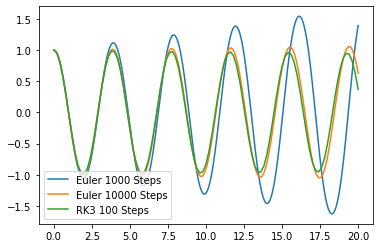

In [170]:
#%%writefile exercise5.py

from expm_ode import expm_ode
from pendulum_ode import pendulum_ode
import numpy as np


#Pendulum system

f_ode = pendulum_ode 
xRange = np.array ( [ 0.0, 20.0 ] ) 
yInit = np.array ( [ 1, 0 ] )

# Euler, 1000 step

numSteps = 1000

x1, y1 = forward_euler ( f_ode , xRange, yInit , numSteps )

# Euler, 10000 step

numSteps = 10000

x2, y2 = forward_euler ( f_ode , xRange, yInit , numSteps )

# RK3, 100 step

numSteps = 100

x3, y3 = rk3 ( f_ode , xRange, yInit , numSteps )

# Plot

import matplotlib.pyplot as plt 

theta1 = y1[:,0]
plt.plot ( x1, theta1, label = "Euler 1000 Steps" )

theta2 = y2[:,0]
plt.plot ( x2, theta2 , label = "Euler 10000 Steps")

theta3 = y3[:,0]
plt.plot ( x3, theta3, label = "RK3 100 Steps" )

plt.legend()
plt.savefig("pendulum from Euler and RK3.pdf")
plt.show()

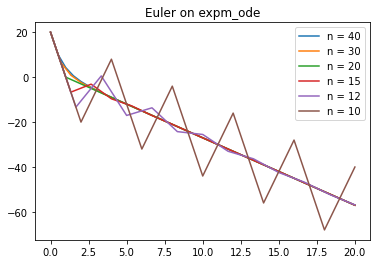

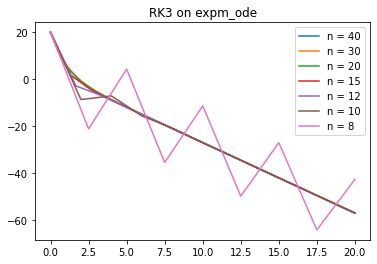

In [168]:
#%%writefile exercise6.py

from expm_ode import expm_ode
from pendulum_ode import pendulum_ode
import numpy as np
import matplotlib.pyplot as plt 

# Euler on expm_ode

f_ode = expm_ode 
xRange = np.array ( [ 0.0, 20.0 ] ) 
yInit = 20

numSteps = np.array([40, 30, 20, 15, 12, 10])
for step in numSteps:
    x1, y1 = forward_euler ( f_ode , xRange, yInit , step )    
    theta1 = y1[:,0]
    plt.plot ( x1, theta1, label = f"n = %d" % step)
    
plt.legend()
plt.title("Euler on expm_ode")
plt.savefig("exercise6_euler.pdf")
plt.show()

# rk3 on expm_ode

f_ode = expm_ode 
xRange = np.array ( [ 0.0, 20.0 ] ) 
yInit = 20

numSteps = np.array([40, 30, 20, 15, 12, 10,8])
for step in numSteps:
    x1, y1 = rk3 ( f_ode , xRange, yInit , step )    
    theta1 = y1[:,0]
    plt.plot ( x1, theta1, label = f"n = %d" % step)
    
plt.legend()
plt.title("RK3 on expm_ode")
plt.savefig("exercise6_rk3.pdf")
plt.show()

In [180]:
#%%writefile ab2_v2.py
#! /usr/bin/env python3
#
def ab2 ( f_ode, xRange, yInitial, numSteps ):

    import numpy as np

    x = np.zeros ( numSteps + 1 )
    y = np.zeros ( ( numSteps + 1, np.size ( yInitial ) ) )

    dx = ( xRange[1] - xRange[0] ) / numSteps

    for k in range ( 0, numSteps + 1 ):
        if ( k == 0 ):
            x[k] = xRange[0]
            y[k,:] = yInitial
        elif ( k == 1 ):
            fValue = f_ode ( x[k-1], y[k-1,:] )
            xhalf = x[k-1] + 0.5 * dx
            yhalf = y[k-1,:] + 0.5 * dx * fValue
            fValuehalf = f_ode ( xhalf, yhalf )
            x[k] = x[k-1] + dx
            y[k,:] = y[k-1,:] + dx * fValuehalf
        else:
            fValueold = fValue
            fValue = f_ode ( x[k-1], y[k-1,:] )
            x[k] = x[k-1] + dx
            y[k,:] = y[k-1,:] + dx * ( 3.0 * fValue - fValueold ) / 2.0

    return x, y

def ab2_test ( ):

#
#
    import matplotlib.pyplot as plt
    import numpy as np

    print ( '' )
    print ( 'ab2_test():' )
    print ( '  Solve the humps ODE system using ab2().' )

    f = humps_deriv
    tspan = np.array ( [ 0.0, 2.0 ] )
    y0 = 5.1765
    n = 100
    t, y = ab2 ( f, tspan, y0, n )

    plt.plot ( t, y, 'r-', linewidth = 2 )

    a = tspan[0]
    b = tspan[1]
    if ( a <= 0.0 and 0.0 <= b ):
        plt.plot ( [a,b], [0,0], 'k-', linewidth = 2 )

    ymin = min ( y )
    ymax = max ( y )
    if ( ymin <= 0.0 and 0.0 <= ymax ):
        plt.plot ( [0, 0], [ymin,ymax], 'k-', linewidth = 2 )

        plt.grid ( True )
        plt.xlabel ( '<--- T --->' )
        plt.ylabel ( '<--- Y(T) --->' )
        plt.title ( 'ab2_test(): time plot' )

        filename = 'ab2.jpg'
        plt.savefig ( filename )
        print ( '  Graphics saved as "%s"' % ( filename ) )
        plt.show ( )
        plt.close ( )

    return

def humps_deriv ( x, y ):

    yp = - 2.0 * ( x - 0.3 ) / ( ( x - 0.3 )**2 + 0.01 )**2 \
       - 2.0 * ( x - 0.9 ) / ( ( x - 0.9 )**2 + 0.04 )**2

    return yp

    if ( __name__ == '__main__' ):
        ab2_test ( )



In [184]:
#%%write exercise7.py

from expm_ode import expm_ode
from pendulum_ode import pendulum_ode
import numpy as np
import matplotlib.pyplot as plt 
from ab2 import ab2
# ab2 on expm_ode

f_ode = expm_ode 
xRange = np.array ( [ 0.0, 2.0 ] ) 
yInit = 1

numSteps = np.array([10,20,40,80,160,320])


#x = 2 and y2 = −2exp(−x) − 3x + 3
xt = 2
y2 = -2 * np.exp(- xt) - 3 * xt + 3

# error = approx soln - exact soln
e = np.zeros(len(numSteps))

# error ratio r[k]= e[k] / e[k+1]
r = np.zeros(len(numSteps) - 1)

for i in range(0, len(numSteps)):
    x, y = ab2 ( f_ode , xRange, yInit , numSteps[i] )
    e[i] = y[-1,0]- y2 
    print("i = ", i, " y[-1,0]=", y[-1,0])
for i in range(0,5):
    r[i]= e[i] / e[i+1]
    
print(e,r)



i =  0  y[-1,0]= -3.28013992708
i =  1  y[-1,0]= -3.272988422541522
i =  2  y[-1,0]= -3.2712426022632974
i =  3  y[-1,0]= -3.2708125786377398
i =  4  y[-1,0]= -3.2707059410063066
i =  5  y[-1,0]= -3.270679393810478
[-9.46936061e-03 -2.31785607e-03 -5.72035790e-04 -1.42012165e-04
 -3.53745331e-05 -8.82733725e-06] [4.0853963  4.05194239 4.02807599 4.01453114 4.00738434]
